In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

import pickle as pkl
import networkx as nx

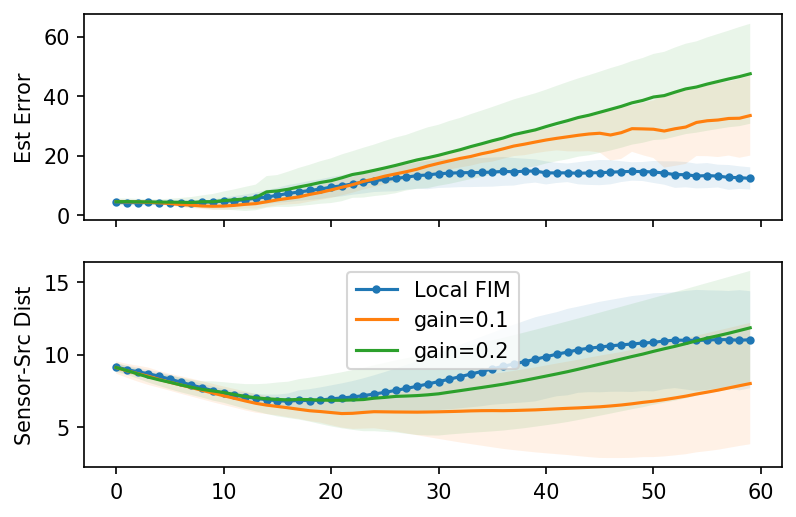

In [81]:
fig, axes = plt.subplots(2,dpi=150,sharex=True)
  
for gain in  [0,0.1,0.2]:

    expr= "CoordDescent-F_gain_ratio{}-v{}".format(gain,1)
    filepath = "{}.pkl".format(expr)
    with open(filepath,'rb') as file:
        rep_record = pkl.load(file)

    # print(rep_record)
    #     title=r"Consensus Gain={}".format(gain)

    qs = np.array([record['src_locs']['source_1'] for record in rep_record])
    # qs.shape = (n_expr,n_step,q_dim)

    
    if gain==0:
        label = 'Local FIM'
        marker='.'
    else:
        label = 'gain={}'.format(gain)
        marker=''
        
    ax = axes[0]
    est = np.array([list(rec['est_locs_log'].values()) for rec in rep_record])
    err = np.median(np.linalg.norm(est-qs[:,np.newaxis,:,:],axis=-1),axis=1)
    err_ave = np.mean(err,axis=0)
    err_sd = np.std(err,axis=0)
    t = np.arange(len(err_ave))
    ax.plot(t,err_ave,label=label,marker=marker)
    ax.fill_between(t,err_ave-err_sd,err_ave+err_sd,alpha=0.1)
    ax.set_ylabel('Est Error')

    ax = axes[1]
    loc = np.array([list(rec['sensor_locs'].values()) for rec in rep_record])
    dist = np.median(np.linalg.norm(loc-qs[:,np.newaxis,:,:],axis=-1),axis=1)
#     dist = np.linalg.norm(loc[:,1,:,:]-qs,axis=-1)

    dist_ave = np.mean(dist,axis=0)
    dist_sd = np.std(dist,axis=0)
    t = np.arange(len(dist_ave))
    ax.plot(t,dist_ave,label=label,marker=marker)
    ax.fill_between(t,dist_ave-dist_sd,dist_ave+dist_sd,alpha=0.1)
    ax.set_ylabel("Sensor-Src Dist")
    
plt.legend()
plt.show()

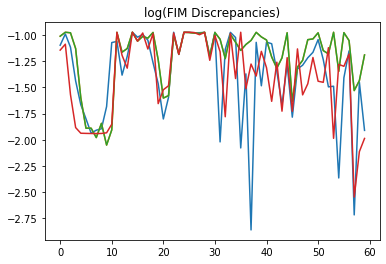

In [78]:
FIM_est=np.array([list(rep_record[i]['FIM_est'].values()) for i in range(len(rep_record))])

FIM_est_mean = np.mean(FIM_est,axis=0)

FIM_dev = np.std(FIM_est_mean,axis=0).reshape(-1,4)
FIM_norm = np.linalg.norm(FIM_est_mean,axis=0).reshape(-1,4)
for i in range(4):
    plt.plot(np.log(FIM_dev[:,i]/FIM_norm[:,i]))
plt.title('log(FIM Discrepancies)')
plt.show()

In [61]:
FIM_norm.shape

(60, 4)